In [1]:
from iotbx.map_manager import map_manager as MapManager
from mmtbx.model import manager as ModelManager
from iotbx.data_manager import DataManager
from iotbx.map_model_manager import map_model_manager as MapModelManager


In [2]:
%load_ext line_profiler

In [3]:
import os
import pickle
from multiprocessing import Pool
from collections import Counter
import numpy as np
from collections import OrderedDict
import operator

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn-notebook")
plot_scale = 3
font_scale = 5

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16*plot_scale, 11*plot_scale),
         'axes.labelsize': 10*font_scale,
         'axes.titlesize':10*font_scale,
         'xtick.labelsize':10*font_scale,
         'ytick.labelsize':10*font_scale}
plt.rcParams.update(params)

In [5]:
# read in entries

entry_composition_path = "data/entry_composition.pkl" #list of group_args objects
with open(entry_composition_path,"rb") as fh:
    entry_composition_list = pickle.load(fh)

In [6]:
ligand_entries = [entry for entry in entry_composition_list if len(entry.composition._result.other_cnts)>0]

In [7]:
len(ligand_entries)

2504

In [8]:
# check which entry has the most ligands out of curiosity
most_ligands_entry = entry_composition_list[0]
for entry in entry_composition_list:
    if len(entry.composition._result.other_cnts) > len(most_ligands_entry.composition._result.other_cnts):
        most_ligands_entry = entry
print(most_ligands_entry)
print(most_ligands_entry.composition.result())

group_args
  _stop_dynamic_attributes__enabled : True
  composition                    : <mmtbx.model.statistics.composition object at 0x7f900990af50>
  date                           : 2019-03-06
  entry                          : 6jlu_9839
  entry_emdb                     : 9839
  entry_pdb                      : 6jlu
  error                          : None
  map_file                       : /net/cci-filer2/raid1/emdb_mirror/structures/EMD-9839/map/emd_9839.map.gz
  map_file_1                     : None
  map_file_2                     : None
  model_file                     : /net/cci/pdb_mirror/mmcif/jl/6jlu.cif.gz
  resolution                     : 3.02
group_args
  n_atoms                        : 102777
  n_chains                       : 128
  n_hd                           : 0
  n_nucleotide                   : 0
  n_other                        : 820
  n_protein                      : 9704
  n_water                        : 1
  other_cnts                     : Counter({'UNK': 

# lets explore this most complicated composition...

In [9]:
dm = DataManager()
dm.process_model_file(most_ligands_entry.model_file)
model = dm.get_model()


params: None


In [10]:
if model.crystal_symmetry() is None:
    from cctbx.maptbx.box import shift_and_box_model
    model = shift_and_box_model(model)

params: None


In [11]:
h = model.get_hierarchy()

residue_groups = [rg for chain in h.chains() for rg in chain.residue_groups()]
#residue_models = [model.select(rg.atoms().extract_i_seq()) for rg in residue_groups] # slow, model.select is slow
        

In [12]:
sel = residue_groups[0].atoms().extract_i_seq()

In [13]:
model.select(sel)

params: <libtbx.phil.scope_extract object at 0x7f900a06c990>


Model manager 
None
Chains: 1 Residues 1 
Working coordinate shift (0, 0, 0))

In [30]:
%prun -s cumtime model.select(sel)

In [19]:
print(grand_master_phil_str)

pdb_interpretation
  .alias = refinement.pdb_interpretation
  .short_caption = Model interpretation
{
    
  restraints_library
    .short_caption = Restraints library selection
    .style = box auto_align
  {
    cdl = True
      .type = bool
      .short_caption = Use Conformation-Dependent Library
      .help = Use Conformation Dependent Library (CDL)         for geometry restraints
      .style = bold
    mcl = True
      .type = bool
      .short_caption = Use Metal Coordination Library (MCL)
      .help = Use Metal Coordination Library (MCL)         for tetrahedral Zn++ and iron-sulfur clusters SF4, FES, F3S, ...
      .style = bold
    cis_pro_eh99 = False
      .type = bool
      .style = hidden
    omega_cdl = False
      .type = bool
      .short_caption = Use Omega Conformation-Dependent Library
      .help = Use Omega Conformation Dependent Library (omega-CDL)         for geometry restraints
      .style = hidden
    cdl_svl = False
      .type = bool
      .short_caption =

In [24]:
from iotbx.phil import parse
from mmtbx.monomer_library.pdb_interpretation import grand_master_phil_str
from mmtbx.geometry_restraints.torsion_restraints.reference_model import reference_model_str
from mmtbx.geometry_restraints.external import external_energy_params_str

In [27]:
%%timeit
phil = parse(
          input_string = grand_master_phil_str +\
                         reference_model_str +\
                         external_energy_params_str,
          process_includes=True)

10 loops, best of 3: 68.4 ms per loop


In [37]:
stats.calc_callees()

In [ ]:
stats

In [146]:
sel = atoms.extract_i_seq()

In [11]:
chains = [chain for chain in h.chains()]

In [15]:
residue_groups = [rg for rg in chain.residue_groups()]

In [119]:
residue_groups = [rg for chain in h.chains() for rg in chain.residue_groups()]
residue_groups = [rg.]


10525


In [40]:
 sel_str_other = "not (water or nucleotide or protein)"
other_cnts = Counter()
other_models = {}
for rg in model.select(model.selection(sel_str_other)).get_hierarchy().residue_groups():
    assert (len(rg.unique_resnames())==1) # we anticipate that each residue group has 1 residue name
    for resname in rg.unique_resnames():
        other_cnts[resname]+=1
        if resname not in other_models.keys():
            other_models[resname] = []
        other_models[resname].append("blah")

In [42]:
model.select(rg)

ArgumentError: Python argument types in
    root.select(root, residue_group)
did not match C++ signature:
    select(iotbx::pdb::hierarchy::root {lvalue}, scitbx::af::const_ref<unsigned long, scitbx::af::trivial_accessor> atom_selection, bool copy_atoms=False)
    select(iotbx::pdb::hierarchy::root {lvalue}, scitbx::af::const_ref<bool, scitbx::af::trivial_accessor> atom_selection, bool copy_atoms=False)

In [43]:
atoms = rg.atoms()

In [52]:
rmodel = model.select(model.selection("resid "+str(rg.resid()).strip()))

In [62]:
model.get_model_input().chains()

AttributeError: 'input' object has no attribute 'chains'

In [72]:
from cctbx.array_family import flex
from libtbx import group_args

In [126]:
def extract_residues(model):
    h = model.get_hierarchy()
    residues = [] # group args objects
    for chain in h.chains():
        for rg in chain.residue_groups():
            rg_i_seqs = []
            r_name = None
            for ag in rg.atom_groups():
                if(r_name is None): r_name = ag.resname
                for atom in ag.atoms():
                    rg_i_seqs.append(atom.i_seq)
                if(len(rg_i_seqs) != 0):
                    residues.append(group_args(
                    selection = flex.size_t(rg_i_seqs),
                    name      = r_name,
                    resid     = rg.resid(),
                    chain_id  = chain.id))

    return residues

In [128]:
atoms = rg.atoms()

In [131]:
np.array(atoms.extract_i_seq())

array([102776])

1

In [134]:
rg.id_str()

' Z 201 '

In [104]:
model.get_model_statistics_info()

In [121]:
er = extract_residues(model)

In [122]:
len(er)

10525

In [123]:
er[0]

group_args
  chain_id                       : A
  name                           : VAL
  resid                          :   11 
  selection                      : <scitbx_array_family_flex_ext.size_t object at 0x7f550c5c2260>

In [124]:
er[1]

group_args
  chain_id                       : A
  name                           : SER
  resid                          :   12 
  selection                      : <scitbx_array_family_flex_ext.size_t object at 0x7f550c5c23c0>

In [80]:
model.select(er[0].selection)

AttributeError: 'list' object has no attribute 'selection'

In [18]:
sel_str_other = "not (water or nucleotide or protein)"
model_other = model.select(model.selection(sel_str_other))

In [19]:
model_other

Model manager 
None
Chains: 65 Residues 820 
Working coordinate shift (0, 0, 0))

In [44]:
# get a list of all the ligands that appear in the entries
ligand_list = []
ligand_count = 0
for entry in entry_composition_list:

    composition = entry.composition
    ligands = composition._result.other_cnts.keys()
    n_ligands = np.sum(np.array(composition._result.other_cnts.values()))
    ligand_count+=n_ligands
    for ligand in ligands:
        ligand_list.append(ligand)

In [45]:
len(ligand_list)

6327

In [46]:
# Turn it into a Counter() (Kind of like a histogram)
ligand_counter = Counter(ligand_list)
ligand_counter_sorted = OrderedDict(sorted(ligand_counter.items(), key=operator.itemgetter(1),reverse=True))

In [47]:
len(ligand_counter)

496

Text(0.5,0,'Ligand Code')

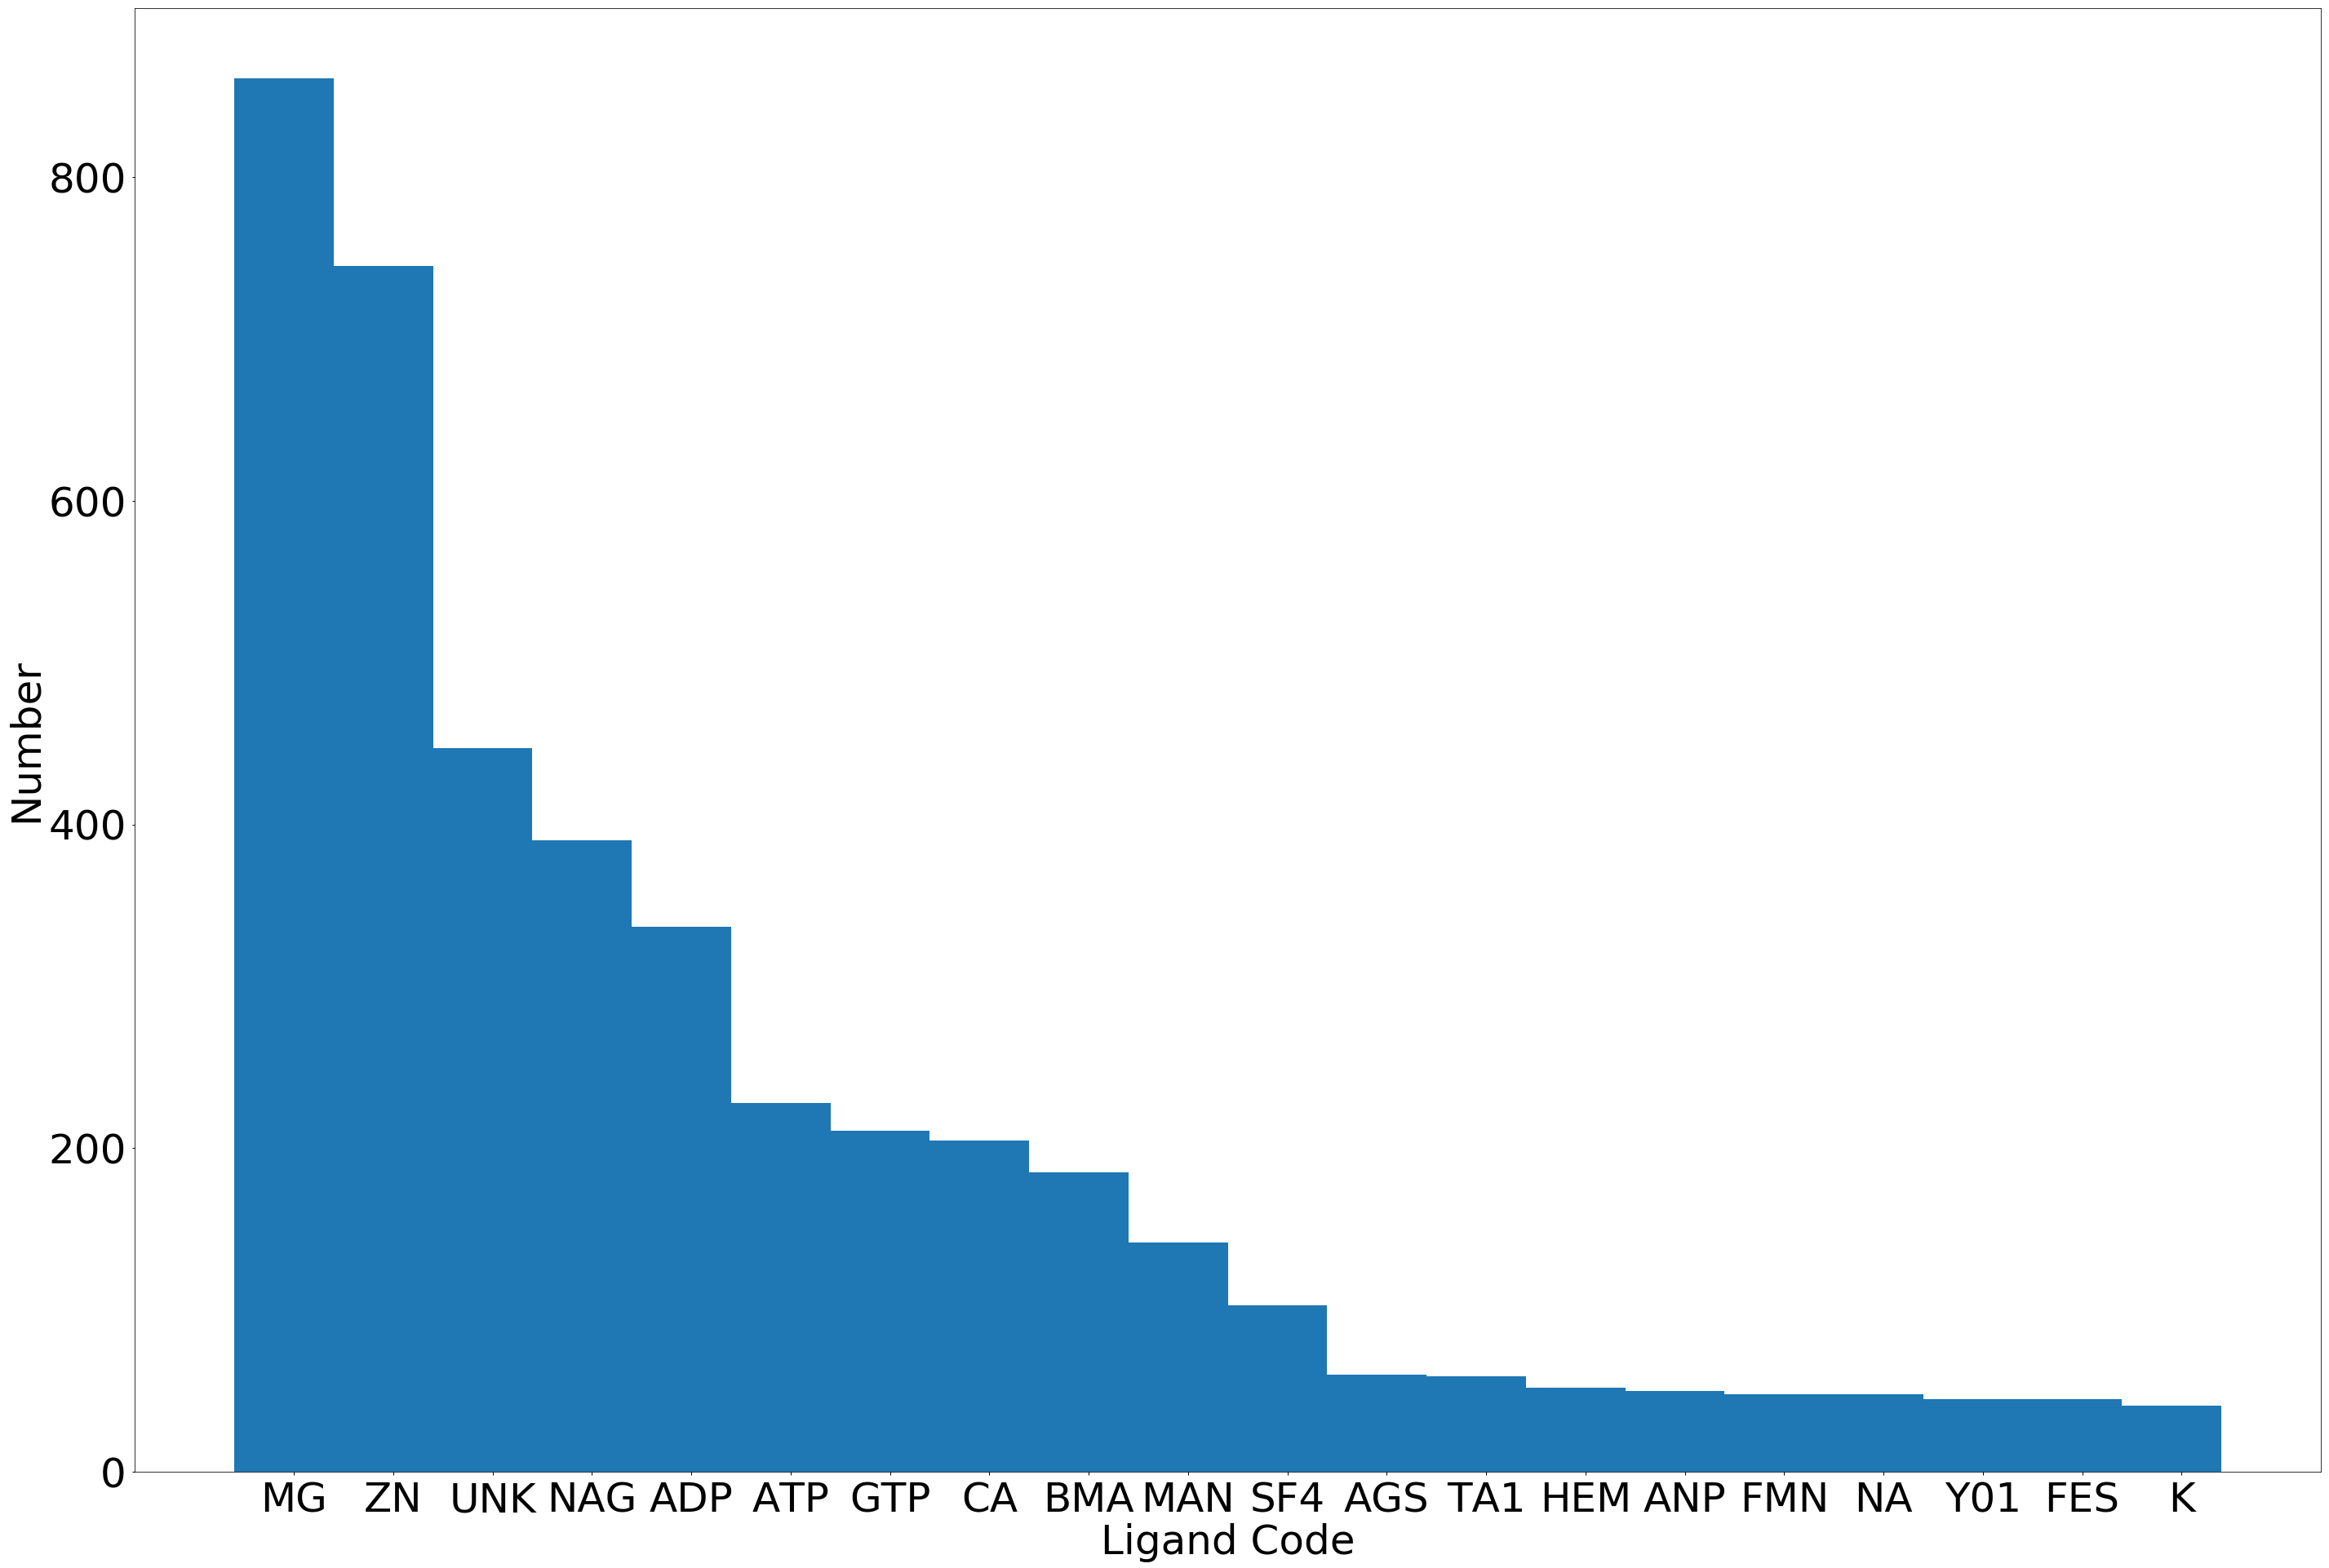

In [52]:
#plot

labels, values = zip(*ligand_counter_sorted.items()[:20])

indexes = np.arange(len(labels))
width = 1
ret = plt.bar(indexes, values, width)
ret = plt.xticks(indexes + width * 0.1, labels)
plt.ylabel("Number")
plt.xlabel("Ligand Code")

In [22]:
# get entries with ADP, ATP, or GTP
nucleotide_entries = []
for entry in entry_composition_list:
    composition = entry.composition
    ligands = composition._result.other_cnts.keys()
    if ("ATP" in ligands) or ("ADP" in ligands) or ("GTP" in ligands):
        nucleotide_entries.append(entry)

In [23]:
len(nucleotide_entries)

630

In [40]:
# write nucleotide entries to disk
nucleotide_entries_path = "data/nucleotide_entries.pkl"
with open(nucleotide_entries_path,"wb") as fh:
    pickle.dump(nucleotide_entries,fh)